In [141]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import torch

random_seed = 1
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)

def get_kidney_dataframe():

    DATA_PATH = "../../sail-safe-functions-test/sail_safe_functions_test/data_sail_safe_functions"
    path_file_csv = os.path.join(DATA_PATH, "data_csv_kidney_clean", "kidney_disease_clean.csv")
    df =  pd.read_csv(path_file_csv)
    df = pd.get_dummies(data=df)

    return df

def get_test_federation_split(df):

    train = df.sample(frac=0.8, random_state=0)
    test = df.drop(train.index)
    
    shuffled = train.sample(frac=1)
    result = np.array_split(shuffled, 5)  

    return result, test

dataframe = get_kidney_dataframe()



In [142]:
import torch

data_federation = dataframe

X_col = ['age']
Y_col = ['age']
in_layer = len(X_col)
out_layer = len(Y_col)
optimizer = "SGD"
criterion = "MSELoss"
epochs = 1000
learn_rate = 0.0001

In [143]:
dataframe.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc', 'rbc_abnormal', 'rbc_normal', 'pc_abnormal',
       'pc_normal', 'pcc_notpresent', 'pcc_present', 'ba_notpresent',
       'ba_present', 'htn_no', 'htn_yes', 'dm_ yes', 'dm_no', 'dm_yes',
       'cad_no', 'cad_yes', 'appet_good', 'appet_poor', 'pe_no', 'pe_yes',
       'ane_no', 'ane_yes', 'classification_ckd', 'classification_notckd'],
      dtype='object')

In [144]:
from helper_libs.shared.models.LinearRegression import LinearRegression

model = LinearRegression(in_layer, out_layer)

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)

inputs = Variable(ModelUtility.dataframe_to_tensor(dataframe[X_col]))
labels = Variable(ModelUtility.dataframe_to_tensor(dataframe[Y_col]))


In [145]:
from helper_libs.scn_side.machine_learning.ModelUtility import ModelUtility
from torch.autograd import Variable

for epoch in range(epochs):

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(691.0760, grad_fn=<MseLossBackward0>)
epoch 0, loss 691.0759887695312
tensor(117.1776, grad_fn=<MseLossBackward0>)
epoch 1, loss 117.17761993408203
tensor(19.8684, grad_fn=<MseLossBackward0>)
epoch 2, loss 19.868431091308594
tensor(3.3689, grad_fn=<MseLossBackward0>)
epoch 3, loss 3.3688526153564453
tensor(0.5712, grad_fn=<MseLossBackward0>)
epoch 4, loss 0.5712161064147949
tensor(0.0969, grad_fn=<MseLossBackward0>)
epoch 5, loss 0.09685426950454712
tensor(0.0164, grad_fn=<MseLossBackward0>)
epoch 6, loss 0.01642214134335518
tensor(0.0028, grad_fn=<MseLossBackward0>)
epoch 7, loss 0.0027844009455293417
tensor(0.0005, grad_fn=<MseLossBackward0>)
epoch 8, loss 0.0004721646837424487
tensor(8.0062e-05, grad_fn=<MseLossBackward0>)
epoch 9, loss 8.006174175534397e-05
tensor(1.3580e-05, grad_fn=<MseLossBackward0>)
epoch 10, loss 1.3580201084550936e-05
tensor(2.2968e-06, grad_fn=<MseLossBackward0>)
epoch 11, loss 2.296835418746923e-06
tensor(3.9027e-07, grad_fn=<MseLossBackward0>)
epoch

[[48.]
 [ 7.]
 [62.]
 [48.]
 [51.]
 [60.]
 [68.]
 [24.]
 [52.]
 [53.]
 [50.]
 [63.]
 [68.]
 [68.]
 [68.]
 [40.]
 [47.]
 [47.]
 [60.]
 [62.]
 [61.]
 [60.]
 [48.]
 [21.]
 [42.]
 [61.]
 [75.]
 [69.]
 [75.]
 [68.]
 [55.]
 [73.]
 [61.]
 [60.]
 [70.]
 [65.]
 [76.]
 [72.]
 [69.]
 [82.]
 [46.]
 [45.]
 [47.]
 [35.]
 [54.]
 [54.]
 [48.]
 [11.]
 [73.]
 [60.]
 [53.]
 [54.]
 [53.]
 [62.]
 [63.]
 [35.]
 [76.]
 [76.]
 [73.]
 [59.]
 [67.]
 [67.]
 [15.]
 [46.]
 [55.]
 [44.]
 [67.]
 [45.]
 [65.]
 [26.]
 [61.]
 [46.]
 [64.]
 [53.]
 [56.]
 [ 5.]
 [48.]
 [67.]
 [70.]
 [56.]
 [74.]
 [45.]
 [38.]
 [48.]
 [59.]
 [70.]
 [56.]
 [70.]
 [58.]
 [50.]
 [63.]
 [56.]
 [71.]
 [73.]
 [65.]
 [62.]
 [60.]
 [65.]
 [50.]
 [56.]
 [34.]
 [71.]
 [17.]
 [76.]
 [55.]
 [65.]
 [50.]
 [55.]
 [45.]
 [54.]
 [63.]
 [65.]
 [52.]
 [61.]
 [12.]
 [47.]
 [49.]
 [55.]
 [55.]
 [60.]
 [72.]
 [54.]
 [34.]
 [43.]
 [65.]
 [72.]
 [70.]
 [71.]
 [52.]
 [75.]
 [50.]
 [ 5.]
 [50.]
 [70.]
 [47.]
 [48.]
 [46.]
 [45.]
 [73.]
 [41.]
 [69.]
 [67.]
 [72.]

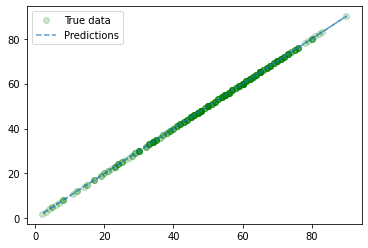

In [146]:
import matplotlib.pyplot as plt

predicted = model(inputs).data.numpy()
print(predicted)

plt.clf()
plt.plot(inputs, labels, 'go', label='True data', alpha=0.2)
plt.plot(inputs, predicted, '--', label='Predictions', alpha=0.7)
plt.legend(loc='best')
plt.show()

In [148]:
from sklearn.metrics import r2_score
r2_score(predicted, labels)

1.0